<a href="https://colab.research.google.com/github/inuwamobarak/depth-estimation-DPT/blob/main/DPTForDepthEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Installing Transformer library
!pip install -q datasets transformers

In [31]:
# Import required libraries and modules
from transformers import AutoImageProcessor, DPTForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

In [32]:
# Define the URL to fetch the image from the COCO dataset
url = "http://farm1.staticflickr.com/230/499938318_cdadac6a73_z.jpg"

# Open the image from the URL using PIL (Python Imaging Library)
image = Image.open(requests.get(url, stream=True).raw)

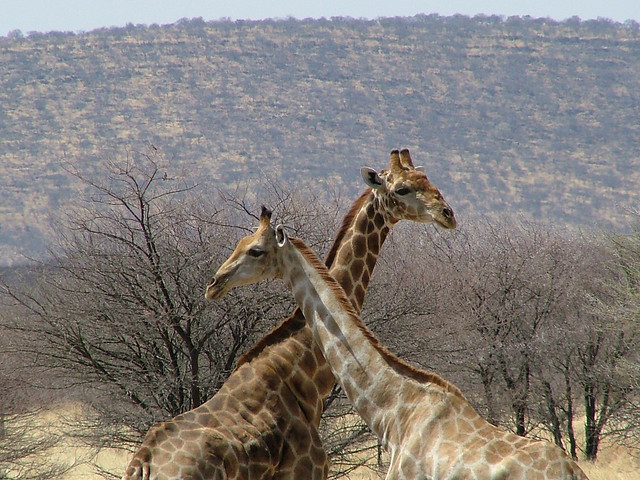

In [37]:
image

In [33]:
# Load the pre-trained AutoImageProcessor and DPTForDepthEstimation models
image_processor = AutoImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
# Prepare the image for the model by encoding it with the image processor
inputs = image_processor(images=image, return_tensors="pt")

# Perform depth estimation on the image using the DPTForDepthEstimation model
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# Interpolate the predicted depth to the original image size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],  # Resizing to the original size of the image
    mode="bicubic",
    align_corners=False,
)

In [35]:
# Visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

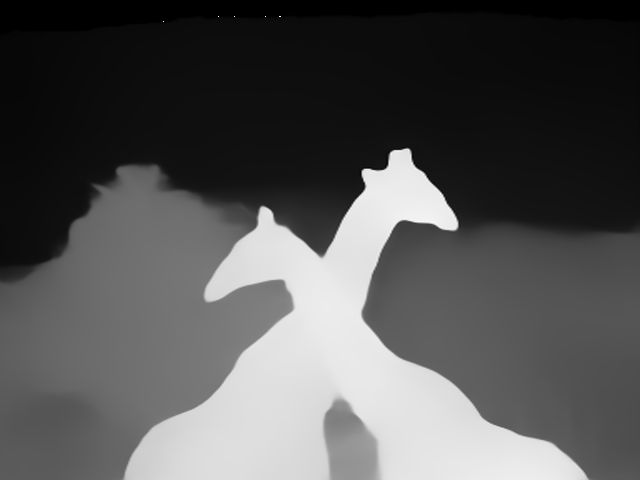

In [36]:
depth